In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [164]:
cross_sections = "./../data/nu_xs_12.txt"

In [165]:
def read_xs_file(f):
    d={}
    log_e, cc_nu, nc_nu, cc_nu_bar, nc_nu_bar = ([] for i in range(5))
    File = open(f,"r")
    lines = File.readlines()
    for line in lines:
        columns = line.split(' ')
        log_e.append(float(columns[0]))
        cc_nu.append(float(columns[1]))
        nc_nu.append(float(columns[2]))
        cc_nu_bar.append(float(columns[3]))
        nc_nu_bar.append(float(columns[4]))
    d["log_E"]=np.array(log_e)
    d["E"]=np.power(10, np.array(log_e))
    d["cc_nu"]=np.array(cc_nu)
    d["nc_nu"]=np.array(nc_nu)
    d["cc_nu_bar"]=np.array(cc_nu_bar)
    d["nc_nu_bar"]=np.array(nc_nu_bar)
    File.close()
    return d

In [166]:
xs=read_xs_file(cross_sections)

In [203]:
#plt.plot(xs['E'], xs['nc_nu'])

In [202]:
# def xs_exp_model(x, a, b): 
#     return np.exp(a+b*x)

In [201]:
# a,b = curve_fit(xs_exp_model, np.log10(xs["E"])[950:], xs["nc_nu"][950:], maxfev=20000 )

In [200]:
# # plt.yscale("log")
# # plt.xscale("log")

# #plt.plot(xs["E"][950:], xs_log(xs["E"][950:], a[0], a[1], a[2]), linewidth=3,label='Fitted log')
# plt.plot(np.log10(xs["E"])[950:], xs_exp(np.log10(xs["E"])[950:], c[0], c[1]), linewidth=3,label='Fitted exp')
# #plt.plot(xs["E"], xs_log(xs["E"], a[0], a[1], a[2]), label='Fitted function')
# #plt.plot(xs["E"][1200:], xs_log(xs["E"][1200:], a[0], a[1], a[2]), label='Fitted function')
# plt.plot(np.log10(xs["E"]),xs["nc_nu"], linewidth=3, alpha=0.5, label="data")
# plt.legend()

In [176]:
len(xs['E'])

2000

In [177]:
def expo_root(x):
    return np.exp(-8.17236*10 + x*0.812287)

This function contains the result of fitting to a model. The fit was obtained with ROOT for numu_nc. 

In [204]:
def expo_composite_nc(x):
    return np.piecewise(x, [x < 8, x >= 8], [lambda x : np.exp(-8.38165*10 + x*1.07417), lambda x : np.exp(-8.18376*10 + x*0.822837)])

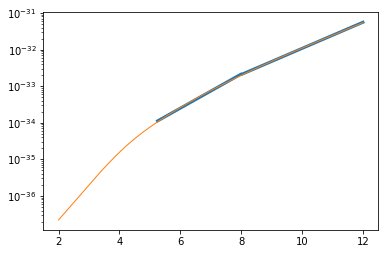

In [205]:
plt.yscale("log")
plt.plot(np.log10(xs["E"][650:]), expo_composite_nc(np.log10(xs["E"][650:])), linewidth=3,label='Fitted exp')
plt.plot(np.log10(xs["E"]), xs['nc_nu'], linewidth=1,label='Fitted exp')

In [206]:
def expo_composite_cc(x):
    return np.piecewise(x, [x < 8, x >= 8], [lambda x : np.exp(-8.26068*10 + x*1.03968), lambda x : np.exp(-8.08147*10 + x*0.812867)])

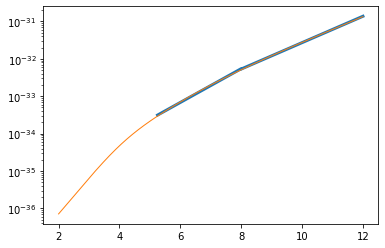

In [207]:
plt.yscale("log")
plt.plot(np.log10(xs["E"][650:]), expo_composite_cc(np.log10(xs["E"][650:])), linewidth=3,label='Fitted exp')
plt.plot(np.log10(xs["E"]), xs['cc_nu'], linewidth=1,label='Fitted exp')